<a href="https://colab.research.google.com/github/lautarooooo/proyecto_integrado2-/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases

import pandas as pd
import numpy as np
import random

# Lista de materias escolares
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Artes", "Música", "Informática"
]

# Lista de apellidos y nombres (puedes ampliarla)
apellidos = ["García", "Rodríguez", "González", "Fernández", "López", "Martínez", "Sánchez", "Pérez", "Gómez", "Díaz"]
nombres = ["Juan", "María", "Pedro", "Ana", "Luis", "Laura", "Carlos", "Lucía", "José", "Marta"]

# Crear una lista vacía para almacenar los datos
data = []

# Generar 100 filas de datos
for i in range(100):
    apellido = random.choice(apellidos)
    nombre = random.choice(nombres)
    dni = random.randint(10000000, 99999999)
    materia = random.choice(materias)
    nota1 = random.randint(1, 10)
    nota2 = random.randint(1, 10)
    nota3 = random.randint(1, 10)
    faltas = random.randint(0, 15)

    data.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])

# Crear el DataFrame
df = pd.DataFrame(data, columns=["Apellido", "Nombre", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

# Mostrar el DataFrame
df

,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Pérez,Ana,77736328,Música,10,8,2,8
1,Díaz,José,95348892,Informática,5,4,8,13
2,González,Laura,70547231,Informática,4,10,1,12
3,Gómez,Marta,23954837,Música,6,2,1,8
4,Rodríguez,Lucía,65448817,Artes,9,3,6,14
...,...,...,...,...,...,...,...,...
95,Martínez,Pedro,18197675,Ciencias Naturales,5,4,10,5
96,Pérez,Lucía,34410674,Matemática,10,8,7,1
97,García,José,85237603,Música,5,7,6,12
98,Gómez,Lucía,34200166,Informática,6,6,9,8


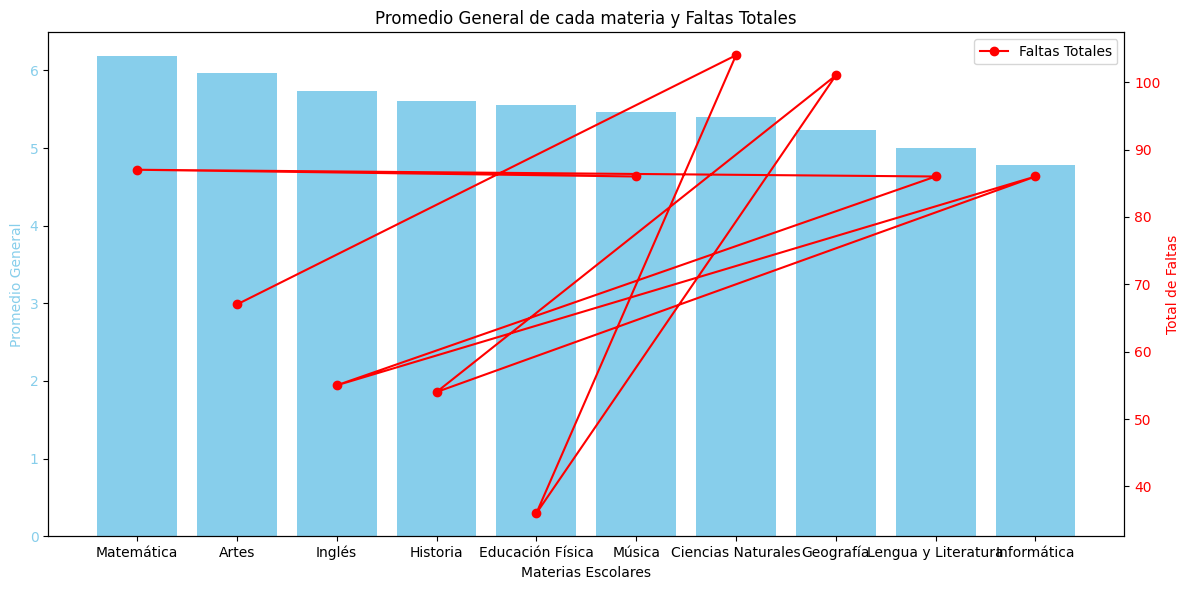

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio de cada materia
promedio_materias = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar de mayor a menor promedio
promedio_materias = promedio_materias.sort_values(ascending=False)

# Calcular el total de faltas por materia
faltas_materias = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar el promedio de las materias
ax1.bar(promedio_materias.index, promedio_materias.values, color='skyblue')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xlabel('Materias Escolares')
ax1.set_title('Promedio General de cada materia y Faltas Totales')

# Crear el segundo eje Y para las faltas
ax2 = ax1.twinx()

# Graficar las faltas
ax2.plot(faltas_materias.index, faltas_materias.values, color='red', marker='o')
ax2.set_ylabel('Total de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotar las etiquetas del eje X para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar la leyenda
plt.legend(['Faltas Totales'], loc='upper right')

# Ajustar el gráfico para evitar superposición de elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)